Ex. 1, What Amsterdam will receive from tourist tax if the event lasts a week and you will have 30.000 visitors? 

In [7]:
import pandas as pd

with open ("C:/Users/maaik/Documents/UNI/MSc MADE/Metropolitan Data/Assignments/Housing data/listings.csv", 'r') as ams_csv: 
    bnb_df = pd.read_csv(ams_csv) 

rows = bnb_df['price'].size
total_price = bnb_df['price'].sum()
average = total_price / rows

mean = bnb_df['price'].mean()
median = bnb_df['price'].median()
print(mean, median)

254.48986405914619 207.0


Out of the data of the AirBnBs in Amsterdam, the average price of a one night stay is calculated. This is €240,71. This does not include the hotels in the Amsterdam. For AirBnB the tax percentage is 10% (overig). For this category there is no fixed price added. 

In [13]:
# Tax per person per night
tax_night = mean * 0.1 
print('Tax per person per night is \u20ac' + str(tax_night))


# For all 30.000 visitors 
tax_visitors_night = tax_night * 30000 
print('Tax for all 30.000 visitors per night is \u20ac' + str(tax_visitors_night))

# The event lasts a week, so they will stay 7 nights 
total_tax_visitors = tax_visitors_night * 7 
print('Total amount of tourist tax Amsterdam will earn from the paralympics is \u20ac' + str(total_tax_visitors))

Tax per person per night is €25.44898640591462
Tax for all 30.000 visitors per night is €763469.5921774387
Total amount of tourist tax Amsterdam will earn from the paralympics is €5344287.145242071


Please note that this is data for the year 2023. It is likely that the tourist tax will be higher in 2025 given the current inflation. Next to this, another critical point is that probably not all of the visitors will stay in Amsterdam, but also in neighboring cities. 

Ex. 2, Plot the amount of AirBnB locations per neighbourhood. 

<Axes: title={'center': 'number of AirBnBs per neighbourhood in Amsterdam'}, xlabel='neighbourhood', ylabel='number of AirBnBs'>

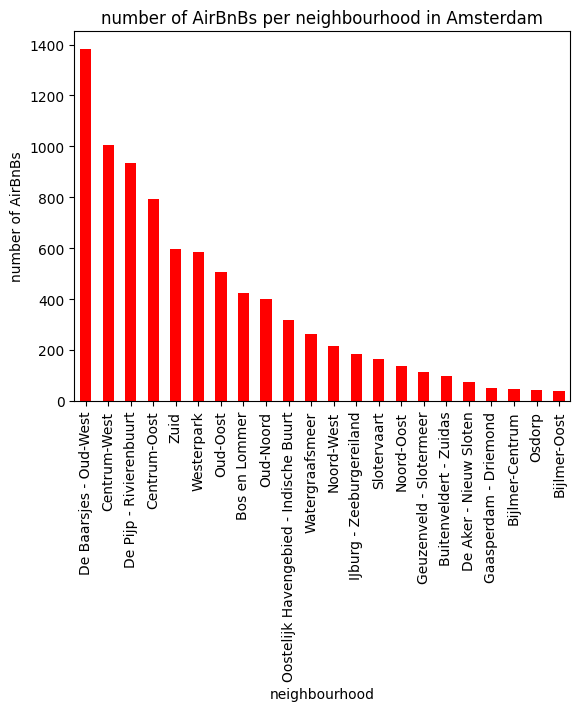

In [35]:
import pandas as pd 
import matplotlib.pyplot as plt 

with open ("C:/Users/maaik/Documents/UNI/MSc MADE/Metropolitan Data/Assignments/Housing data/listings.csv", 'r') as ams_csv: 
    ams_df = pd.read_csv(ams_csv) 

   
plt.ylabel('number of AirBnBs') 
plt.xlabel('neighbourhood') 
plt.title('number of AirBnBs per neighbourhood in Amsterdam') 

ams_df['neighbourhood'].value_counts().plot (kind='bar',color='r') 

Excercise 3, Which street in Amsterdam has the most AirBnB apartments?  

In [38]:
import pandas as pd
from geopy.geocoders import Nominatim


geolocator = Nominatim(user_agent="geo_locator")
ams_df = ams_df.head(10)

# Function to get street address from latitude and longitude
def get_street_address(row):
    location = geolocator.reverse((row['latitude'], row['longitude']), language='en', exactly_one=True)
    if location:
        print(location.raw)
        return location.raw['address']['road']
    else:
        return "Unknown Street"

# Apply the function to the DataFrame and create a new column 'Street'
ams_df['street'] = ams_df.apply(get_street_address, axis=1)

# print(ams_df)

# Count the occurrences of each street to find the street with the most Airbnb apartments
most_common_street = ams_df['street'].mode().iloc[0]

# Count the number of apartments on the most common street
apartment_count = ams_df[ams_df['street'] == most_common_street].shape[0]

print(f"The street in Amsterdam with the most Airbnb apartments is '{most_common_street}' with {apartment_count} apartments.")


{'place_id': 171796820, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright', 'osm_type': 'way', 'osm_id': 280764133, 'lat': '52.401009', 'lon': '4.9515278047393405', 'class': 'man_made', 'type': 'pumping_station', 'place_rank': 30, 'importance': 9.99999999995449e-06, 'addresstype': 'man_made', 'name': 'Gemaal Jisperveldstraat', 'display_name': 'Gemaal Jisperveldstraat, Jisperveldstraat, Noord, Zunderdorp, Amsterdam, North Holland, Netherlands, 1024 BC, Netherlands', 'address': {'man_made': 'Gemaal Jisperveldstraat', 'road': 'Jisperveldstraat', 'suburb': 'Noord', 'village': 'Zunderdorp', 'city': 'Amsterdam', 'municipality': 'Amsterdam', 'state': 'North Holland', 'ISO3166-2-lvl4': 'NL-NH', 'country': 'Netherlands', 'postcode': '1024 BC', 'country_code': 'nl'}, 'boundingbox': ['52.4009688', '52.4010492', '4.9514575', '4.9515981']}
{'place_id': 168819413, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright', 'osm_type': 'node', '

In [20]:
# import module
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")

Latitude = ams_df['latitude'].astype(str)
Longitude = ams_df['longitude'].astype(str)
 
location = geolocator.reverse("{}, {}".format(Latitude, Longitude))
#location = geolocator.reverse(float(','.join([Latitude, Longitude])))
 
# Display
print(location)

# Apply the function to the DataFrame and create a new column 'StreetAddress'
subset_df['StreetAddress'] = subset_df.apply(lambda row: get_street_address(row['latitude'], row['longitude']), axis=1)

plt.ylabel('number of AirBnBs')
plt.xlabel('Streetnames')
plt.title('AirBnBs per street in Amsterdam')
ams_df['StreetAddress'].value_counts().plot(kind='bar',color='r')


ValueError: Must be a coordinate pair or Point

4. Try to cross reference the data from the AirBnB dataset with the BBGA. Can you figure out if all apartments of AirBnB are designated as housing? Which number of apartments are not rented out all the time but are also used as normal housing?  

In [37]:
import pandas as pd

with open ("C:/Users/maaik/Documents/UNI/MSc MADE/Metropolitan Data/Assignments/Housing data/bbga.csv", 'r') as bbg_csv:
    bbg_df = pd.read_csv(bbg_csv)

print(bbg_df)

        jaar;gebiedcode15;variabele;waarde
0               2023;STAD;BEVTOTAAL;918193
1                   2023;A;BEVTOTAAL;90020
2                    2023;B;BEVTOTAAL;1009
3                  2023;E;BEVTOTAAL;148569
4                  2023;F;BEVTOTAAL;163448
...                                    ...
5719240      2018;1105;SKACTI_1000INW;16.7
5719241       2018;1106;SKACTI_1000INW;4.6
5719242       2018;1107;SKACTI_1000INW;2.7
5719243       2018;1108;SKACTI_1000INW;4.4
5719244       2018;1109;SKACTI_1000INW;1.9

[5719245 rows x 1 columns]
